# 🚀 Project 01 (Advanced): Multi-Variable Churn Model
### *Precision through 5-Level Logic & Trapezoidal Functions*

**The Goal:** Moving from a simple model to a professional engineering tool.
**Key Upgrades:**
1.  **3rd Input:** Added `Support Calls` (A critical predictor of frustration).
2.  **5 Linguistic Levels:** From (Low/Med/High) to (Very Low -> Very High).
3.  **Trapezoidal MFs:** Handling "Saturation" (where values stay at 100% membership).

---
### 🛠️ Step 1: Variable Definition
We define the **Universe of Discourse** for each variable.
* **Tenure:** 0 to 72 months.
* **Monthly Charges:** $0 to $150.
* **Support Calls:** 0 to 10 calls/month.
* **Churn Probability:** 0 to 100% (Output).

In [3]:
# Simple setup
!pip install scikit-fuzzy -q
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define Universes
tenure = ctrl.Antecedent(np.arange(0, 73, 1), 'tenure')
charges = ctrl.Antecedent(np.arange(0, 151, 1), 'charges')
calls = ctrl.Antecedent(np.arange(0, 11, 1), 'calls')
churn = ctrl.Consequent(np.arange(0, 101, 1), 'churn')

# 1. Tenure (5 Levels - Using trapmf at edges)
tenure['v_short'] = fuzz.trapmf(tenure.universe, [0, 0, 6, 12])
tenure['short'] = fuzz.trimf(tenure.universe, [8, 20, 35])
tenure['medium'] = fuzz.trimf(tenure.universe, [25, 36, 50])
tenure['long'] = fuzz.trimf(tenure.universe, [45, 55, 65])
tenure['v_long'] = fuzz.trapmf(tenure.universe, [60, 68, 72, 72])

# 2. Charges (5 Levels)
charges['v_low'] = fuzz.trapmf(charges.universe, [0, 0, 20, 35])
charges['low'] = fuzz.trimf(charges.universe, [25, 45, 65])
charges['medium'] = fuzz.trimf(charges.universe, [55, 75, 95])
charges['high'] = fuzz.trimf(charges.universe, [85, 110, 130])
charges['v_high'] = fuzz.trapmf(charges.universe, [120, 140, 150, 150])

# 3. Support Calls (3 Levels - Frustration factor)
calls['low'] = fuzz.trapmf(calls.universe, [0, 0, 1, 3])
calls['med'] = fuzz.trimf(calls.universe, [2, 4, 7])
calls['high'] = fuzz.trapmf(calls.universe, [6, 8, 10, 10])

# 4. Output: Churn Probability (5 Levels)
churn['v_low'] = fuzz.trapmf(churn.universe, [0, 0, 10, 20])
churn['low'] = fuzz.trimf(churn.universe, [15, 30, 45])
churn['medium'] = fuzz.trimf(churn.universe, [40, 55, 70])
churn['high'] = fuzz.trimf(churn.universe, [65, 80, 90])
churn['v_high'] = fuzz.trapmf(churn.universe, [85, 95, 100, 100])

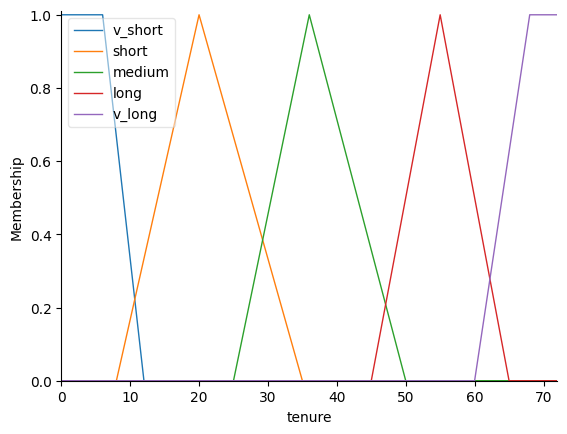

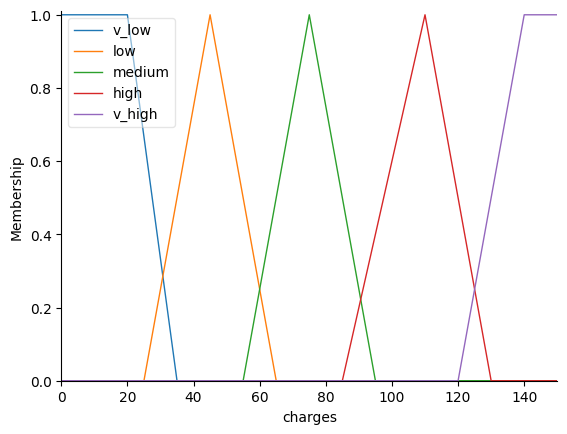

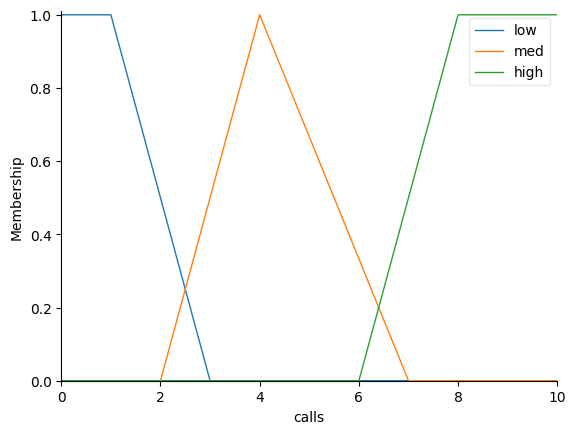

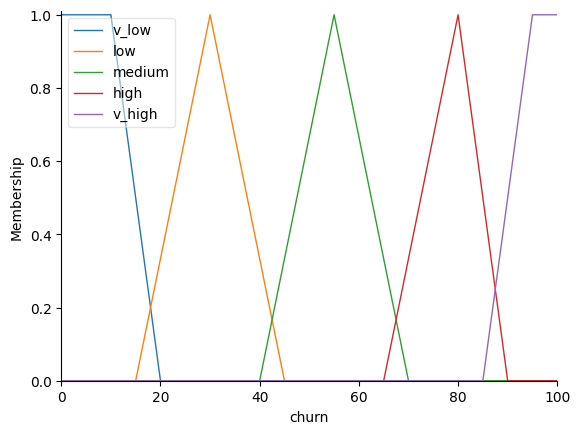

In [4]:
# Check our work: Do the functions overlap correctly?
# This visualization proves we have no 'Dead Zones'
tenure.view()
charges.view()
calls.view()
churn.view()

### 🧠 Step 2: Strategic Rule Set
With 3 variables, we cover the most important logical paths. We use **Expert Knowledge** to balance "Loyalty" vs "Cost" vs "Frustration".

| Rule | Logic (IF) | Result (THEN) |
| :--- | :--- | :--- |
| **R1** | Very Short Tenure AND High Calls | **Very High Churn** |
| **R2** | Very Long Tenure AND Low Calls | **Very Low Churn** |
| **R3** | Very High Charges AND High Calls | **Very High Churn** |
| **R4** | Medium Tenure AND Medium Charges | **Medium Churn** |
| **R5** | High Calls (Any tenure) | **High Churn** |
| **R6** | Very Long Tenure AND Very Low Charges | **Very Low Churn** |
| **R7** | Short Tenure AND Very High Charges | **High Churn** |
| **R8** | Long Tenure AND High Charges | **Medium Churn** |
| **R9** | Very Low Charges AND Low Calls | **Very Low Churn** |
| **R10**| Medium Tenure AND High Calls | **High Churn** |

Calculated Advanced Risk: 85.50%


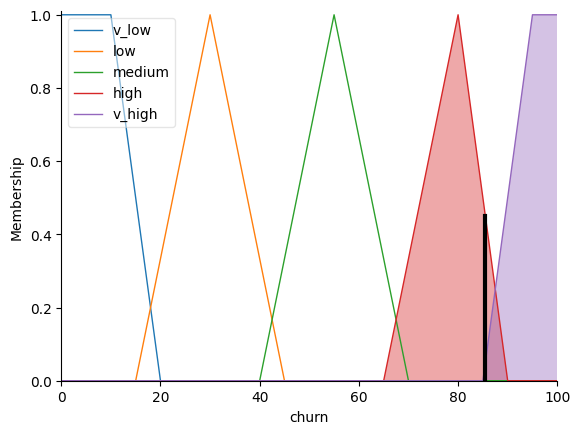

In [5]:
# Define Rules
rules = [
    ctrl.Rule(tenure['v_short'] & calls['high'], churn['v_high']),
    ctrl.Rule(tenure['v_long'] & calls['low'], churn['v_low']),
    ctrl.Rule(charges['v_high'] & calls['high'], churn['v_high']),
    ctrl.Rule(tenure['medium'] & charges['medium'], churn['medium']),
    ctrl.Rule(calls['high'], churn['high']),
    ctrl.Rule(tenure['v_long'] & charges['v_low'], churn['v_low']),
    ctrl.Rule(tenure['short'] & charges['v_high'], churn['high']),
    ctrl.Rule(tenure['long'] & charges['v_high'], churn['medium']),
    ctrl.Rule(charges['v_low'] & calls['low'], churn['v_low']),
    ctrl.Rule(tenure['medium'] & calls['high'], churn['high'])
]

# Build Engine
churn_ctrl = ctrl.ControlSystem(rules)
engine = ctrl.ControlSystemSimulation(churn_ctrl)

# Test Scenario: Frustrated Customer
engine.input['tenure'] = 4
engine.input['charges'] = 140
engine.input['calls'] = 9

# Calculation
try:
    engine.compute()
    print(f"Calculated Advanced Risk: {engine.output['churn']:.2f}%")
    churn.view(sim=engine)
except KeyError:
    print("Error: Input combination not covered by rules.")

### 📊 Step 3: Mapping the Logic (3D Surface)
Since we have 3 inputs, we fix `Support Calls` to a constant value to visualize the interaction between **Tenure** and **Charges**.

**Note on Stability:** To prevent mathematical errors in the visualization, we use an `error-handling` loop. If a specific point in the grid is not covered by our rules, the system will assign a neutral value ($0$) instead of crashing.

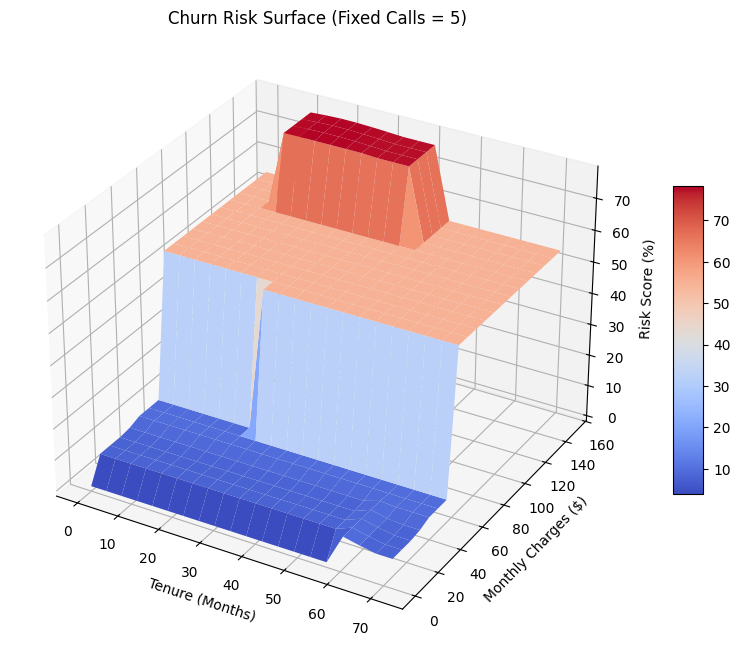

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create Grid
x_ten = np.linspace(0, 72, 20)
y_cha = np.linspace(0, 150, 20)
x_tenure, y_charges = np.meshgrid(x_ten, y_cha)
z_risk = np.zeros_like(x_tenure)

# 2. Compute Surface with Error Handling
for i in range(20):
    for j in range(20):
        engine.input['tenure'] = x_tenure[i, j]
        engine.input['charges'] = y_charges[i, j]
        engine.input['calls'] = 5 # Constant value for visualization

        try:
            engine.compute()
            z_risk[i, j] = engine.output['churn']
        except KeyError:
            # If rules don't cover this point, default to 0
            z_risk[i, j] = 0

# 3. Static Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_tenure, y_charges, z_risk, cmap='coolwarm', edgecolor='none')

ax.set_title('Churn Risk Surface (Fixed Calls = 5)')
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('Monthly Charges ($)')
ax.set_zlabel('Risk Score (%)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

### 🕹️ Bonus: Interactive 3D Model
Interactive models allow us to inspect the "Trapezoidal Saturation" from different angles.
* **Action:** Drag to rotate, scroll to zoom.
* **Tool:** `Plotly` - providing a smooth, web-based experience.

In [9]:
import plotly.graph_objects as go

# Create Interactive Surface using the pre-calculated z_risk
fig = go.Figure(data=[go.Surface(z=z_risk, x=x_ten, y=y_cha, colorscale='Viridis')])

# Clean Layout Configuration
fig.update_layout(
    title='Interactive Churn Map (Support Calls = 5)',
    scene = dict(
        xaxis_title='Tenure (Months)',
        yaxis_title='Charges ($)',
        zaxis_title='Risk (%)'
    ),
    width=800,
    height=700,
    margin=dict(l=50, r=50, b=50, t=80)
)

fig.show()

### 🎯 Result: Nuanced Financial Lending
This system moves beyond rigid credit scoring by modeling the **interplay between capacity and history**.

**Key Takeaway:** We identified "Grey Zone" applicants—those rejected by traditional binary systems but identified as "Low-to-Medium Risk" by our fuzzy engine. This allows the institution to **safely expand its lending portfolio** without increasing default rates, proving that mathematical nuance leads to inclusive profitability.